# Lesson 29: Practice with Numpy *solutions*

(c) 2018 Justin Bois. With the exception of pasted graphics, where the source is noted, this work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

This document was prepared at [Caltech](http://www.caltech.edu) with financial support from the [Donna and Benjamin M. Rosen Bioengineering Center](http://rosen.caltech.edu).

<img src="caltech_rosen.png">

*This lesson was generated from a Jupyter notebook.  You can download the notebook [here](l29_practice_with_numpy_solution.ipynb).*

<br /> <br />

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

import altair as alt

import bootcamp_utils

Numpy arrays can take a while to get the hang of. Therefore, it's important to practice practice practice!

## Practice 1: Computing things!

In the last lesson, we looked at a data set from Harvey and Orbidans on the cross-sectional area of *C. elegans* eggs. Recall, we loaded the data and converted everything to Numpy arrays like this:

In [2]:
df = pd.read_csv('data/c_elegans_egg_xa.csv', comment='#')
df = df.rename(columns={'area (sq. um)': 'area (sq um)'})

xa_high = df.loc[df['food']=='high', 'area (sq um)'].values
xa_low = df.loc[df['food']=='low', 'area (sq um)'].values

Now we would like to compute the diameter of the egg from the cross-sectional area. Write a function that takes in an array of cross-sectional areas and returns an array of diameters. Recall that the diameter $d$ and cross-sectional area $A$ are related by $A = \pi d^2/4$. There should be no `for` loops in your function!

Below, is a skeleton for your function for you to fill in.

In [3]:
def xa_to_diameter(xa):
    """
    Convert an array of cross-sectional areas
    to diameters with commensurate units.
    """
    
    # Compute diameter from area
    diameter = ____
    
    return diameter

Use your function to compute the diameters of the eggs.

### Practice 2: solution

In [4]:
def xa_to_diameter(xa):
    """
    Convert an array of cross-sectional areas
    to diameters with commensurate units.
    """
    
    # Compute diameter from area
    diameter = 2 * np.sqrt(xa / np.pi)
    
    return diameter

print('Diameters of eggs from well fed mothers:\n', xa_to_diameter(xa_high))
print('\nDiameters of eggs from poorly fed mothers:\n', xa_to_diameter(xa_low))

Diameters of eggs from well fed mothers:
 [46.29105911 51.22642581 47.76657057 48.5596503  51.59790585 47.61973991
 49.33998388 47.89966242 47.21697198 46.94654036 49.08125119 49.84064959
 47.9926071  46.29105911 47.69988539 48.40207395 48.15152345 49.3141717
 49.57168871 47.87307365 48.30991705 46.29105911 46.12573337 46.24978308
 46.41466697 47.87307365 48.15152345 48.95137203 45.72372833 47.18999856
 46.68817945 45.98750791 46.53794651 52.2111661  48.70364742 47.23045291
 47.06842687 46.81073869 45.97366251 49.57168871 50.8397116  48.54653847
 52.08909166 48.24398292]

Diameters of eggs from poorly fed mothers:
 [48.40207395 51.58556628 52.55146594 50.31103472 53.06982074 54.57203767
 50.32368681 52.24773281 53.99739399 49.44309786 53.87936676 47.9926071
 52.41804019 47.87307365 52.11352942 51.21399674 52.44232467 50.47526453
 50.8397116  51.56087828 49.84064959 55.96578669 50.72688754 50.58864976
 52.18677405 52.44232467 51.78264653 52.57568879 51.86863366 52.67246879
 49.05530287 

<br />

## Practice 2: Working with two-dimensional arrays

Numpy enables you do to matrix calculations on two-dimensional arrays. In exercise, you will practice doing matrix calculations on arrays. We'll start by making a matrix and a vector to practice with. You can copy and paste the code below.

In [5]:
A = np.array([[6.7, 1.3, 0.6, 0.7],
              [0.1, 5.5, 0.4, 2.4],
              [1.1, 0.8, 4.5, 1.7],
              [0.0, 1.5, 3.4, 7.5]])

b = np.array([1.1, 2.3, 3.3, 3.9])

**a)** First, let's practice slicing.

1. Print row 1 (remember, indexing starts at zero) of `A`.
2. Print columns 1 and 3 of `A`.
3. Print the values of every entry in `A` that is greater than 2.
4. Print the diagonal of `A`. using the `np.diag()` function.

#### Solution

In [6]:
# 1.
print(A[1,:])

# 2.
print(A[:,[1,3]])

# 3. 
print(A[A>2])

# 4.
print(np.diag(A))

[0.1 5.5 0.4 2.4]
[[1.3 0.7]
 [5.5 2.4]
 [0.8 1.7]
 [1.5 7.5]]
[6.7 5.5 2.4 4.5 3.4 7.5]
[6.7 5.5 4.5 7.5]


**b)** The `np.linalg` module has some powerful linear algebra tools. 

1. First, we'll solve the linear system $\mathsf{A}\cdot \mathbf{x} = \mathbf{b}$. Try it out: use `np.linalg.solve()`. Store your answer in the Numpy array `x`.
2. Now do `np.dot(A, x)` to verify that $\mathsf{A}\cdot \mathbf{x} = \mathbf{b}$.
3. Use `np.transpose()` to compute the transpose of `A`.
4. Use `np.linalg.inv()` to compute the inverse of `A`.

#### Solution

In [7]:
# 1.
x = np.linalg.solve(A, b)

# 2.
print('A . x:\n', np.dot(A, x))
print('\nb:\n', b)

# 3.
print('\ntranspose of A:\n', np.transpose(A))

# 4.
print('\ninverse of A:\n', np.linalg.inv(A))

A . x:
 [1.1 2.3 3.3 3.9]

b:
 [1.1 2.3 3.3 3.9]

transpose of A:
 [[6.7 0.1 1.1 0. ]
 [1.3 5.5 0.8 1.5]
 [0.6 0.4 4.5 3.4]
 [0.7 2.4 1.7 7.5]]

inverse of A:
 [[ 0.15267508 -0.03365026 -0.01778     0.00054854]
 [-0.00906001  0.19788853  0.03719385 -0.07090934]
 [-0.04391535 -0.0144834   0.26880108 -0.05219479]
 [ 0.02172029 -0.0330119  -0.12929526  0.17117684]]


**c)** Sometimes you want to convert a two-dimensional array to a one-dimensional array. This can be done with `np.ravel()`. 

1. See what happens when you do `B = np.ravel(A)`.
2. Look of the documentation for `np.reshape()`. Then, reshape `B` to make it look like `A` again.

#### Solution

In [8]:
# 1.
B = np.ravel(A)
print(B)

# 2.
np.reshape(B, A.shape)

[6.7 1.3 0.6 0.7 0.1 5.5 0.4 2.4 1.1 0.8 4.5 1.7 0.  1.5 3.4 7.5]


array([[6.7, 1.3, 0.6, 0.7],
       [0.1, 5.5, 0.4, 2.4],
       [1.1, 0.8, 4.5, 1.7],
       [0. , 1.5, 3.4, 7.5]])

<br />

## Practice 3: Are they Normally distributed?

We might be interested to see if the egg cross-section data follow a Normal distribution. After all, this is commonly an underlying assumption when people report data from repeated measurements in the literature.

One way to assess this is to plot the theoretical CDF with the same mean and standard deviation as the data on top of the ECDFs. (There are better graphical ways to do this, but this is ok for our purposes here.)  We know the cumulative distribution function for a Normal distribution with mean $\mu$ and standard deviation $\sigma$ is

\begin{align}
\mathrm{cdf}(x) = \frac{1}{2}\left(1 + \mathrm{erf}\left(\frac{x - \mu}{\sqrt{2\sigma^2}}\right)\right),
\end{align}

but instead of coding this up directly, we can use the `scipy.stats` to do it for us!  We just need to supply where we want the CDF evaluated ($x$), and the mean (the location parameter) and standard deviation (the scale parameter). Something like this:

In [9]:
# Make smooth x-values
x = np.linspace(1600, 2500, 400)

# Compute theoretical Normal distribution
cdf_theor = scipy.stats.norm.cdf(x, loc=np.mean(xa_low), scale=np.std(xa_low))

Now, let's make the plot.

>1. Generate a data frame that you can use to plot the ECDFs of egg cross-sectional area for worms with high food and low food. I would prefer to plot it with the "dot" style, but it is up to you.
2. Make smooth curves of the Normal CDF using `scipy.stats.norm.cdf()` and place them in a data frame suitable for plotting.
3. Make plots of the smooth curves and the data.

### Practice 5: solution

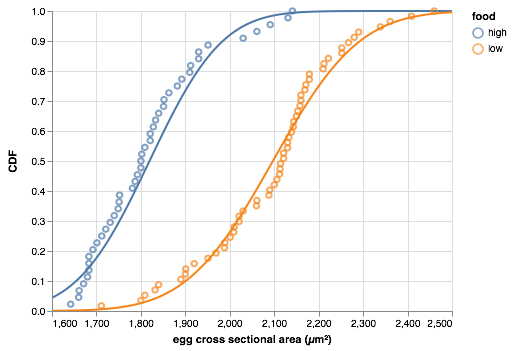

In [10]:
# 1. Generate ECDFs
grouped = df.groupby('food')
df['ECDF'] = grouped.transform(bootcamp_utils.ecdf_y)

# 2. Generate a data fram with smooth curves
df_summary = grouped.agg([np.mean, np.std])
x = np.linspace(1600, 2500, 400)
df_list = []
for key, g in grouped['area (sq um)']:
    cdf = scipy.stats.norm.cdf(x, loc=g.mean(), scale=g.std())
    df_list.append(pd.DataFrame(data={'x': x,
                                      'CDF': cdf,
                                      'food': key}))
df_smooth = pd.concat(df_list, ignore_index=True)

# 3. Make plots
smooth = alt.Chart(df_smooth
    ).mark_line(
        color='gray'
    ).encode(
        x=alt.X('x:Q', title='egg cross sectional area (µm²)'),
        y='CDF:Q',
        color=alt.Color('food:N', legend=None),
        order='x:Q')

dots = alt.Chart(df
    ).mark_point(
    ).encode(
        x=alt.X('area (sq um):Q', title='egg cross sectional area (µm²)'),
        y=alt.Y('ECDF:Q', title='CDF'),
        color=alt.Color('food:N'))

smooth + dots

<br />

### A reminder about documentation

It is important to note that I didn't just memorize how all of these functions work when I wrote these practice exercises.  I looked at the online documentation.  For example, I looked at the [`alt.Color` documentation](https://altair-viz.github.io/user_guide/API.html#altair.Color), and the [`scipy.stats.norm` documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).  To find those links, I just Googled "Altair color legend" and "`scipy.stats`".

These packages are all very well documented, and those docs will be your guide.  You don't need to memorize (though you will eventually just by accident).